# Let's test your implementation of KNN 

In [1]:
# import your class on KNN
from KNNClassifier import KNN
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

C:\Users\NimeshsinhDesai\Anaconda3\envs\SelfDrivingCar\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
assert KNN is not None # 'KNN should be imported'
assert 'fit' in dir(KNN) and 'predict' in dir(KNN) # 'Your implementation should follow the sklearn standards (fit and predict methods)'

# Pick 3 Datasets
Either from the /datasets available in github (which should be familiar from last week) or by directly downloading any 3 datasets from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Import Dataset1:

In [3]:
# Note: If you implemented Knn for one feature and one label only, you will have to trim the dataset.
# BONUS: Extend your Knn Algorithm to be valid for any size of features in your dataset. 
# BONUS2: Create a function in your original knn class to calculate the time it takes to execute from start to finish.
# data = make_blobs(n_samples=300, centers=4, n_features=2, cluster_std=0.6, random_state=0)
# df = pd.DataFrame({'x1': data[0][:,0], 'x2': data[0][:,1], 'y': data[1]})
# # df.reset_index()

In [3]:
data = datasets.load_iris()
datasets.load_iris().keys()
df = pd.DataFrame(data = data.data)
df.columns = data.feature_names
df['class'] = data.target
df['target'] = data.target
df['class'] = df['class'].apply(lambda x: data['target_names'][x])
df.sample(n=10, random_state=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,target
14,5.8,4.0,1.2,0.2,setosa,0
98,5.1,2.5,3.0,1.1,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
16,5.4,3.9,1.3,0.4,setosa,0
131,7.9,3.8,6.4,2.0,virginica,2
56,6.3,3.3,4.7,1.6,versicolor,1
141,6.9,3.1,5.1,2.3,virginica,2
44,5.1,3.8,1.9,0.4,setosa,0
29,4.7,3.2,1.6,0.2,setosa,0
120,6.9,3.2,5.7,2.3,virginica,2


## Load your data into X and y


In [31]:
# load your data into X and y numpy arrays
# X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']].to_numpy()
X = df[['petal length (cm)', 'petal width (cm)']].to_numpy()
y = df['target'].to_numpy()

In [12]:
assert X is not None and type(X) == np.ndarray, 'X should be defined and be a numpy array'
assert y is not None and type(y) == np.ndarray, 'y should be defined and be a numpy array'

## Plot X showing the class

example
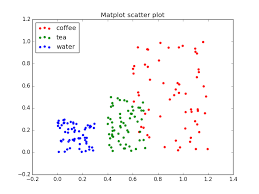

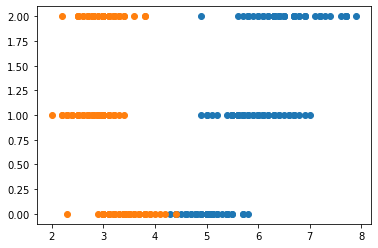

In [20]:
# plot X showing the classes hold in y
plt.scatter(df['sepal length (cm)'].values,df['target'].values)
plt.scatter(df['sepal width (cm)'].values, df['target'].values)
plt.show()

## Fit the model

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
model = KNN(K=3)
model.fit(X_train, y_train)

In [16]:
assert model is not None and type(model) == KNN,'Fit method should return itself'

## Predict the classes for the same data

In [17]:
prediction = model.predict(X_test)
print('Accuracy {:0.2f}%'.format(model.evaluate(prediction, y_test)))
# print(accuracy_score(y_test, prediction))

Accuracy 93.33%


## Show the decission boundaries depending on K for your model
example
<img src="https://i.stack.imgur.com/ZDVhm.png" width="300"/>
(tricky one so we are going to help you out with this one)

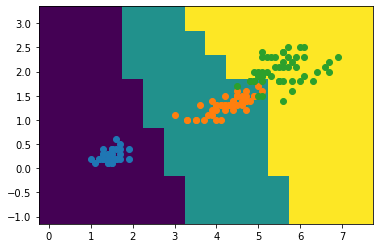

In [43]:
from ipywidgets import interact

@interact
def plot_decision_boundary(k=(1,10,1)):
    model = KNN(K=k)
    model.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                         np.arange(y_min, y_max, 0.5))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, shading='auto')

    for c in set(y):
        plt.scatter(*X[y==c].T)
    

# Repeat this process with Dataset 2 and Dataset 3

In [22]:
## Diabetese
df1 = pd.read_csv('C:/Users/NimeshsinhDesai/Strive_School/Strive_School/w8/d7_knn_naive_bayes/datasets/diabetes.csv', sep=',')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X = df1.drop('Outcome', axis=1).to_numpy()
y = df1['Outcome'].to_numpy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
model2 = KNN(K=3)
model2.fit(X_train, y_train)

In [53]:
prediction2 = model2.predict(X_test)
print('Accuracy {:0.2f}%'.format(model2.evaluate(prediction2, y_test)))
# print(accuracy_score(y_test, prediction))

Accuracy 68.18%


# Compare performance vs Sklearn

In [33]:
## Iris data
from sklearn.neighbors import KNeighborsClassifier
    
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
prediction1 = model1.predict(X_test)
# print('Accuracy {:0.2f}%'.format(model.evaluate(prediction1, y_test)))
print(accuracy_score(y_test, prediction1))

0.9666666666666667


In [29]:
## Diabetes data
model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [30]:
prediction3 = model3.predict(X_test)
# print('Accuracy {:0.2f}%'.format(model3.evaluate(prediction3, y_test)))
print(accuracy_score(y_test, prediction1))

0.7077922077922078
